In [24]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [25]:
def generate_examples(num=1000):
    W =[1.0, -3.0]
    b = 1.0

    W = np.reshape(W,(2,1))
    x = np.random.randn(num, 2)
    y = b + np.dot(x, W) + np.random.randn(num, 1)
    y = np.reshape(y, (num,1))
    return x, y

In [26]:
x, y = generate_examples()

In [27]:
print(x.shape, y.shape)

(1000, 2) (1000, 1)


In [28]:
print(x[0], y[0])

[-0.85695732  0.15516351] [1.16550417]


In [29]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features,1)
        self.b = np.random.randn()

In [30]:
model = Model(2)
print(model.W)
print(model.b)

[[-0.02581426]
 [ 0.87291399]]
-0.18130376720043515


In [31]:
class Model(Model):
    def forward_pass(self, x):
        y_hat = self.b + np.dot(x, self.W)
        return y_hat

    def compute_loss(self, y_hat, y_true):
        m = y_hat.shape[0]
        return np.sum((y_hat - y_true)**2) / (2*m)

In [32]:
y_hat = Model(2).forward_pass(x)
print(y_hat.shape, y_hat[0])

(1000, 1) [0.41548537]


In [33]:
def compute_loss(self, y_hat, y_true):
    m = y_hat.shape[0]
    return np.sum((y_hat - y_true)**2) / (2*m)


In [34]:
model = Model(2)
y_hat= model.forward_pass(x)
loss = model.compute_loss(y_hat, y)

In [35]:
loss

np.float64(11.050850163719646)

In [36]:
class Model(Model):
    def backward_pass(self, x, y_true, y_hat):
        m = y_true.shape[0]
        db = 1/m*np.sum(y_hat-y_true)
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat-y_true), x), axis=0)
        return dW, db

In [37]:
model = Model(2)
x, y = generate_examples()
y_hat = model.forward_pass(x)
dW, db = model.backward_pass(x, y, y_hat)

In [38]:
print(dW, db)

[-1.46690094  2.79310783] -1.7074400939629957


In [39]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W= self.W-lr*np.reshape(dW, (self.num_features,1))
        self.b = self.b-db

In [40]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            losses.append(loss)
            if i%int(iterations/10) == 0:
                print('Iter: {}, Loss: {:.4f}'.format(i, loss))
        return losses


In [41]:
import numpy as np

class LinearModel:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

    def forward_pass(self, X):
        y = self.b + np.dot(X, self.W)
        return y

    def compute_loss(self, y, y_true):
        loss = np.sum(np.square(y - y_true))
        return loss/(2*y.shape[0])

    def backward_pass(self, X, y_true, y_hat):
        m = y_hat.shape[0]
        db = np.sum(y_hat - y_true)/m
        dW = np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)/m
        return dW, db

    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - lr * db

    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(iterations):
            y_hat = self.forward_pass(x_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            loss = self.compute_loss(y_hat, y_train)
            losses.append(loss)
            if i % int(iterations/10) == 0:
                print('Iter: {}, Current loss: {:.4f}'.format(i, loss))
        return losses

In [42]:
model = Model(2)

In [43]:
x_train, y_train = generate_examples()

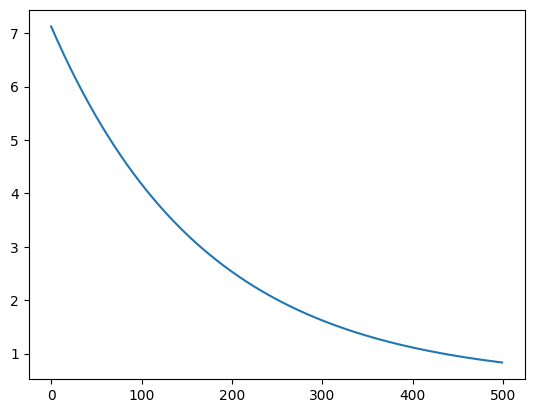

In [44]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [45]:
import numpy as np

# ---------------------------
# Data Generator
# ---------------------------
def generate_examples(num=1000):
    W = np.array([[1.0], [-3.0]])   # true weights
    b = 1.0                         # true bias
    x = np.random.randn(num, 2)     # (num,2) features
    noise = np.random.randn(num, 1) # per-sample noise
    y = b + x @ W + noise           # linear relation + noise
    return x, y


# ---------------------------
# Linear Regression Model
# ---------------------------
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

    def forward_pass(self, x):
        return self.b + x @ self.W

    def compute_loss(self, y_hat, y_true):
        m = y_hat.shape[0]
        return np.sum((y_hat - y_true) ** 2) / (2 * m)

    def backward_pass(self, x, y_true, y_hat):
        m   = y_true.shape[0]
        err = y_hat - y_true          # (m,1)
        dW  = (x.T @ err) / m         # (n,1)
        db  = np.sum(err) / m         # scalar
        return dW, db

    def update_params(self, dW, db, lr):
        self.W -= lr * dW
        self.b -= lr * db

    def train(self, x_train, y_train, iterations=1000, lr=1e-3, log=True):
        losses = []
        log_every = max(iterations // 10, 1)

        for i in range(1, iterations + 1):   # start from 1
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)

            losses.append(loss)

            if log and (i % log_every == 0 or i == 1):
                print(f"Iter: {i}, Loss: {float(loss):.6f}")

        return losses


# ---------------------------
# Training Example
# ---------------------------
x_train, y_train = generate_examples(1000)
model = Model(num_features=2)

losses = model.train(x_train, y_train, iterations=500, lr=3e-3)

print("\nFinal Weights:\n", model.W)
print("Final Bias:\n", model.b)

Iter: 1, Loss: 11.771867
Iter: 50, Loss: 9.242388
Iter: 100, Loss: 7.246659
Iter: 150, Loss: 5.707660
Iter: 200, Loss: 4.520823
Iter: 250, Loss: 3.605532
Iter: 300, Loss: 2.899632
Iter: 350, Loss: 2.355202
Iter: 400, Loss: 1.935295
Iter: 450, Loss: 1.611419
Iter: 500, Loss: 1.361605

Final Weights:
 [[ 1.33735931]
 [-1.65586193]]
Final Bias:
 0.7891042003836448


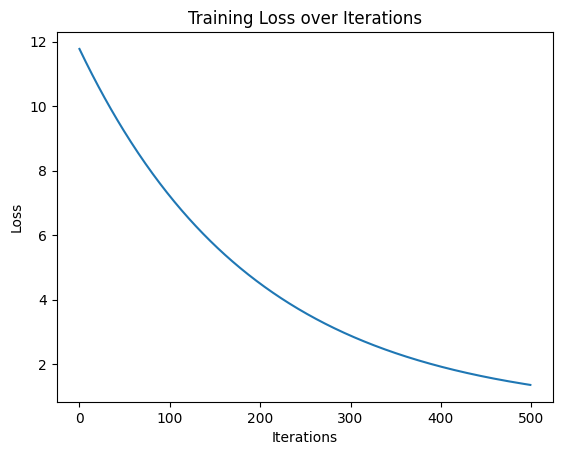

In [46]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.show()